# HW5: Machine Learning

Due: May 15, 11:59 PM.

## Please restart the kernel and run all before you submit ! (-1 Point if you forget to do it)

## Your name (-1 Point if you do not type your name here): Amay Jain

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

## Load dataset

This is a classification dataset. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Run the following cell to load features (X) and labels (y).

In [2]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target

## Part 1: Train test split:

Use 80% of the data to train the model and 20% of the data to test.

In [3]:
from sklearn.model_selection import train_test_split


# converting data from a Bunch object to a dataframe, so that it is easier for me to conceptualize

df = pd.DataFrame(data.data, columns = data.feature_names)
X = df.copy()

df['target'] = data.target
y = df['target'].copy()


# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.033230,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
243,13.750,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.023440,0.1773,0.05429,...,15.01,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.043750,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
316,12.180,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,...,12.85,16.47,81.60,513.1,0.10010,0.05332,0.04116,0.01852,0.2293,0.06037
262,17.290,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.075070,0.2108,0.05464,...,20.39,27.24,137.90,1295.0,0.11340,0.28670,0.22980,0.15280,0.3067,0.07484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,12.620,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.020360,0.1514,0.06019,...,14.20,31.31,90.67,624.0,0.12270,0.34540,0.39110,0.11800,0.2826,0.09585
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.000000,0.1742,0.06059,...,10.49,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
279,13.850,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.037110,0.2110,0.05853,...,14.98,21.74,98.37,670.0,0.11850,0.17240,0.14560,0.09993,0.2955,0.06912
165,14.970,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.019390,0.1515,0.05266,...,15.98,25.82,102.30,782.1,0.10450,0.09995,0.07750,0.05754,0.2646,0.06085


**Question: Why do you need to do train_test split before your run dimension reduction algorithms?**

Answer: You want to make sure that the test data is completely untouched when fitting a model, but if you use dimension reduction algorithms before splitting your data, then that algorithm would have used information from your test data that you wanted untouched and the model would have seen the test data.

## Part 2: Dimension Reduction and visualization

Please implement PCA, kernel PCA and LLE for **training data samples**, and then visualize reduced training data samples in 2D-plane.

Requirements:

1. You should pick a good kernel/hyperparameter for kernel PCA, and number of neighborhoods for LLE. You do not need to show the process.

2. You should include all visualizations in one Figure using subplots. You should add x-label, y-label, legend, and title to make your plots clear. Moreover, you should include the used kernel/hyperparameters for kernel PCA visualization. Please see my sample plots below. Your plots can be different from my plots if parameters are different. But the layout (plot labels, legends, and etc) should be similar.

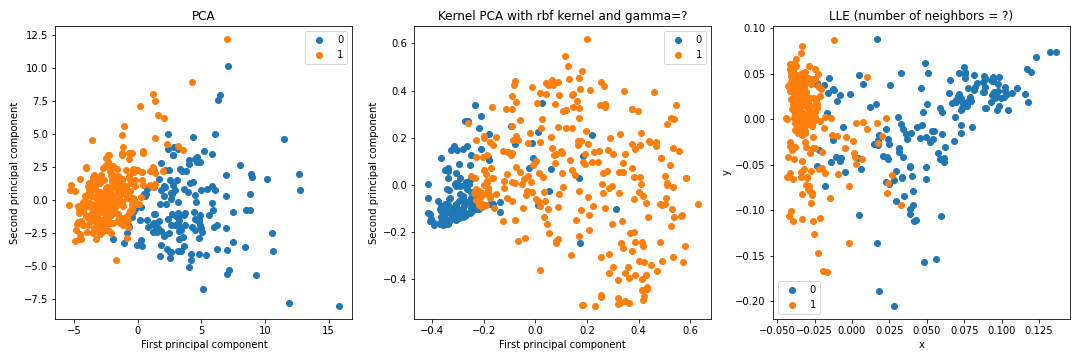

3. In-line comments are required to explain your codes.

Grading is based on the following:
1. You should implement each algorithm correctly. 
2. Comments are included. 
3. Visualization is clear and meets the requirements.





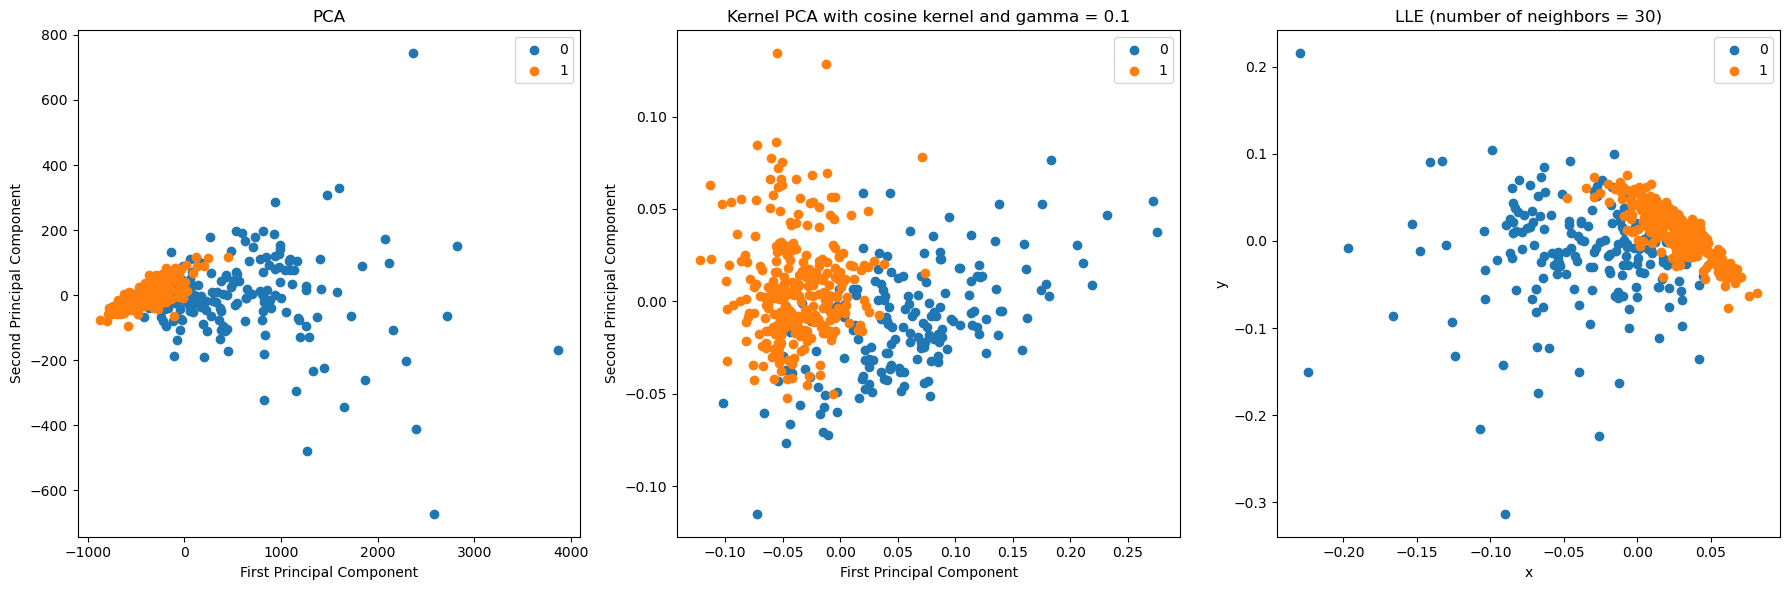

In [5]:
# set up dimension reduction algorithms w/ parameters

# PCA
pca = PCA()

# kernel PCA
kernel = 'cosine'
gamma = 0.1
kernel_pca = KernelPCA(n_components = 2, kernel = kernel, gamma = gamma)

# Local linear embedding
neighbors = 30
lle = LocallyLinearEmbedding(n_components = 10, n_neighbors = neighbors)


# apply algorithms on training data

X_pca = pca.fit_transform(X_train)
X_kernel_pca = kernel_pca.fit_transform(X_train)
X_lle = lle.fit_transform(X_train)


# set up plots

fig, ax = plt.subplots(1, 3, sharey = False, figsize = (18, 6))


# plot first 2 components of each algorithm for each target value of dataset to observe any patterns

for label in np.unique(y_train):

    # plot PCA components
    ax[0].scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1], label = label)

    # plot Kernel PCA components
    ax[1].scatter(X_kernel_pca[y_train == label, 0], X_kernel_pca[y_train == label, 1], label = label)

    # plot LLE components
    ax[2].scatter(X_lle[y_train == label, 0], X_lle[y_train == label, 1], label = label)


# Set titles and legends for each plot

ax[0].set(xlabel = 'First Principal Component', ylabel = 'Second Principal Component')
ax[0].set_title('PCA')
ax[0].legend()

ax[1].set(xlabel = 'First Principal Component', ylabel = 'Second Principal Component')
ax[1].set_title(f'Kernel PCA with {kernel} kernel and gamma = {gamma}')
ax[1].legend()

ax[2].set(xlabel = 'x', ylabel = 'y')
ax[2].set_title(f'LLE (number of neighbors = {neighbors})')
ax[2].legend()

fig.tight_layout()

## Part 3: Train classification models

In this part, you will train several models using **reduced training samples**.

* First of all, based on your visualization result in part 2, please determine which dimension reduction technique you want to use for part 3 and state the reason.

* Second, please do dimension reduction on training samples using the technique you select. (This step is the same as part 2, so you do not need to repeat the code, you can use what you obtain from part 2)

* Third, you should train k-nearest-neighbors, logistic regression, decision tree, random forest, and voting classifier models (use all models mention before) on reduced training samples and then report test accuracy.

* Last, show the decision region for each model. Please look at this reference [code](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) and visualize the decision regions. You should write a function to draw decision region for any classification model and any data samples. Function docstring is required.

Please follow the following instructions and finish part 3. Inline comments are required for your code.

#### 3(a) Determine the dimension reduction technique you will use and state the reason

I will be using the local linear embedding method because it reduces the components to small values which will help when fitting different models and it seems to identify separate clusters for each of the target values the best.

#### 3(b) Do dimension reduction

You can repeat part 2 or use results from part 2

In [18]:
#### Your code here

# Using what I obtained from part 2
# Only want to train on first 2 components


# reduced training data after LLE
X_reduced_train = X_lle[:, :2]

# apply LLE to test data as well
X_reduced_test = lle.transform(X_test)[:, :2]

#### 3(c) Write a function to draw decision region

Your function looks similar as the function in the sample codes, but you should modify the code because it only works for penguin data.

Docsting and inline comments are required.

In [7]:
#### Your function here

def decision_region(model, X, y):
    
    '''
    Plots a decision region for a given classification model and data sample

    Args:
        model (sklearn classification model): Trained Classification model
        X: Dimension Reduced features of data sample 
        y: Target values of data sample

    Returns:
        Decision Region plot for classification model and data sample
    '''

    # separate components of X
    x0 = X[:, 0]
    x1 = X[:, 1]

    # Create prediction points for plotting and combine points into a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # flatten out prediction points and store in a dataframe
    XX = xx.ravel()
    YY = yy.ravel()
    XY = pd.DataFrame({"Component 1": XX, "Component 2": YY})

    # predict with model
    p = model.predict(XY)
    p = p.reshape(xx.shape)

    # set up decision region plot
    fig, ax = plt.subplots(1)

    # apply boundary
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)

    # plot points
    ax.scatter(x0, x1, c = y, cmap = "jet")

    ax.set(xlabel = 'First Principal Component', ylabel = 'Second Principal Component')

#### 3(d) Train k-nearest-neighbors model

You should try different k's and select the best one. You can either use cross-validation or train models using different k manually.

Print the test accuracy for all models, and draw the decision region for the model with the best k.

In [8]:
#### Your code here

# initialize hyperparameter value and cross val score
best_k = -np.inf
best_score = -np.inf

# test out different hyperparameter values
for k in range(1, 31):

    # initialize model with current hyperparameter value
    neigh = KNeighborsClassifier(n_neighbors = k)

    # compute cross val score
    score = cross_val_score(neigh, X_reduced_train, y_train, cv = 5).mean()

    # fit training data to model and compute test accuracy
    neigh.fit(X_reduced_train, y_train)
    print(f"N_neighbors: {k} with test accuracy {neigh.score(X_reduced_test, y_test):.3f}")

    # if new cross val score is better than current best cross val score, update hyperparameter and cross val score values
    if score > best_score:
        best_k = k
        best_score = score


# set up model with best hyperparameter value, train model, then test model
neigh = KNeighborsClassifier(n_neighbors = best_k)
neigh.fit(X_reduced_train, y_train)

acc = neigh.score(X_reduced_test, y_test)
print('\n', f'Test accuracy is {acc:.3f}')

N_neighbors: 1 with test accuracy 0.930
N_neighbors: 2 with test accuracy 0.904
N_neighbors: 3 with test accuracy 0.939
N_neighbors: 4 with test accuracy 0.930
N_neighbors: 5 with test accuracy 0.930
N_neighbors: 6 with test accuracy 0.930
N_neighbors: 7 with test accuracy 0.930
N_neighbors: 8 with test accuracy 0.930
N_neighbors: 9 with test accuracy 0.939
N_neighbors: 10 with test accuracy 0.939
N_neighbors: 11 with test accuracy 0.947
N_neighbors: 12 with test accuracy 0.939
N_neighbors: 13 with test accuracy 0.947
N_neighbors: 14 with test accuracy 0.939
N_neighbors: 15 with test accuracy 0.939
N_neighbors: 16 with test accuracy 0.939
N_neighbors: 17 with test accuracy 0.947
N_neighbors: 18 with test accuracy 0.947
N_neighbors: 19 with test accuracy 0.947
N_neighbors: 20 with test accuracy 0.947
N_neighbors: 21 with test accuracy 0.947
N_neighbors: 22 with test accuracy 0.947
N_neighbors: 23 with test accuracy 0.947
N_neighbors: 24 with test accuracy 0.947
N_neighbors: 25 with test

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


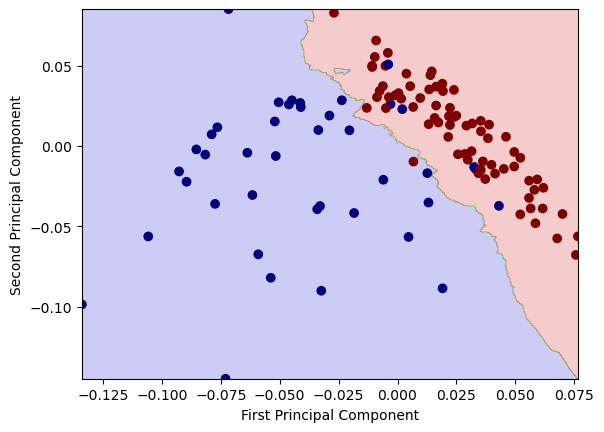

In [9]:
decision_region(neigh, X_reduced_test, y_test)

#### 3(e) Train logistic regression model

No hyperparameter selection needed. 

Print the test accuracy, and draw the decision region.

In [10]:
#### Your code here

# set up model, train model, then test model

Log = LogisticRegression().fit(X_reduced_train, y_train)

acc = Log.score(X_reduced_test, y_test)

print(f'Test accuracy is {acc:.2f}')

Test accuracy is 0.71


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


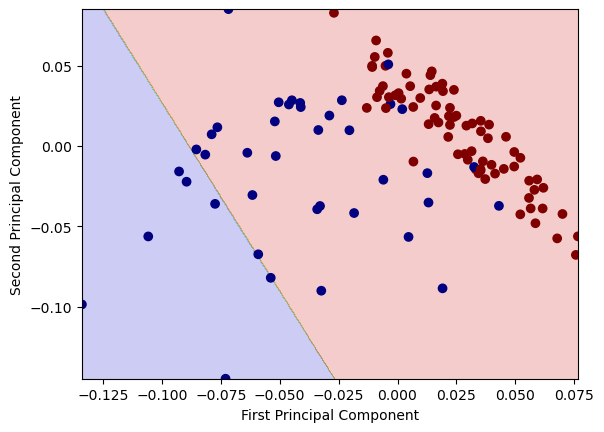

In [11]:
decision_region(Log, X_reduced_test, y_test)

#### 3(f) Train decision tree

You should try different `max_depth` and select the best one.

Print the test accuracy for all models, and draw the decision region with the best `max_depth`.

In [12]:
#### Your code here

# initialize hyperparameter value and cross val score
best_depth = -np.inf
best_score = -np.inf

# test out different hyperparameter values
for d in range(1, 31):

    # initialize model with current hyperparameter value
    Tree = DecisionTreeClassifier(max_depth = d)

    # compute cross val score
    score = cross_val_score(Tree, X_reduced_train, y_train, cv = 5).mean()

    # fit training data to model and compute test accuracy
    Tree.fit(X_reduced_train, y_train)
    print(f"Max depth: {d} with test accuracy {Tree.score(X_reduced_test, y_test):.3f}")

    # if new cross val score is better than current best cross val score, update hyperparameter and cross val score values
    if score > best_score:
        best_depth = d
        best_score = score


# set up model with best hyperparameter value, train model, then test model

Tree = DecisionTreeClassifier(max_depth = best_depth)

Tree.fit(X_reduced_train, y_train)

acc = Tree.score(X_reduced_test, y_test)

print('\n', f'Test accuracy is {acc:.3f}')

Max depth: 1 with test accuracy 0.842
Max depth: 2 with test accuracy 0.825
Max depth: 3 with test accuracy 0.904
Max depth: 4 with test accuracy 0.921
Max depth: 5 with test accuracy 0.930
Max depth: 6 with test accuracy 0.895
Max depth: 7 with test accuracy 0.895
Max depth: 8 with test accuracy 0.904
Max depth: 9 with test accuracy 0.904
Max depth: 10 with test accuracy 0.895
Max depth: 11 with test accuracy 0.895
Max depth: 12 with test accuracy 0.904
Max depth: 13 with test accuracy 0.895
Max depth: 14 with test accuracy 0.895
Max depth: 15 with test accuracy 0.895
Max depth: 16 with test accuracy 0.904
Max depth: 17 with test accuracy 0.904
Max depth: 18 with test accuracy 0.895
Max depth: 19 with test accuracy 0.895
Max depth: 20 with test accuracy 0.904
Max depth: 21 with test accuracy 0.904
Max depth: 22 with test accuracy 0.895
Max depth: 23 with test accuracy 0.895
Max depth: 24 with test accuracy 0.904
Max depth: 25 with test accuracy 0.895
Max depth: 26 with test accuracy 0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


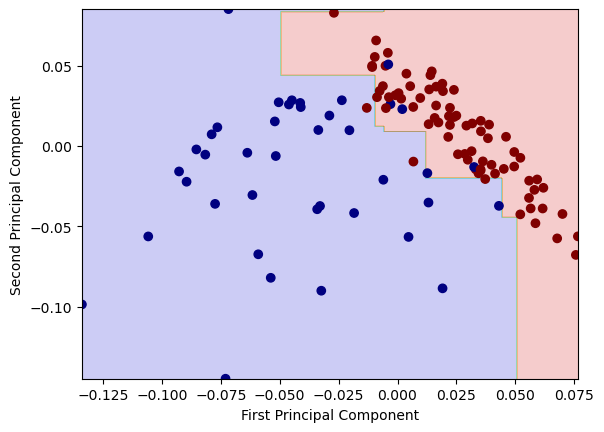

In [13]:
decision_region(Tree, X_reduced_test, y_test)

#### 3(g) Train random forest

You should try different `max_depth` and `n_estimators`, then select the best hyperparameters.

Print the test accuracy for all models, and draw the decision region of the model with selected `max_depth` and `n_estimators`.

In [21]:
#### Your code here

# initialize hyperparameter values and cross val score
best_depth = -np.inf
best_estimators = -np.inf
best_score = -np.inf

# test out different hyperparameter values (combination of depth and estimators)
for d in range(20, 31):
    for n in range(10, 80, 10):

        # initialize model with current hyperparameter values
        rf = RandomForestClassifier(max_depth = d, n_estimators = n)
        
        # compute cross val score
        score = cross_val_score(rf, X_reduced_train, y_train, cv = 5).mean()

        # fit training data to model and compute test accuracy
        rf.fit(X_reduced_train, y_train)
        print(f"Max depth: {d} and n_estimators: {n} with test accuracy {rf.score(X_reduced_test, y_test):.3f}")

        # if new cross val score is better than current best cross val score, update hyperparameter and cross val score values
        if score > best_score:
            best_depth = d
            best_estimators = n
            best_score = score


# set up model with best hyperparameter values, train model, then test model

rf = RandomForestClassifier(max_depth = best_depth, n_estimators = best_estimators)

rf.fit(X_reduced_train, y_train)

acc = rf.score(X_reduced_test, y_test)

print('\n', f'Test accuracy is {acc:.3f}')

Max depth: 20 and n_estimators: 10 with test accuracy 0.912
Max depth: 20 and n_estimators: 20 with test accuracy 0.912
Max depth: 20 and n_estimators: 30 with test accuracy 0.912
Max depth: 20 and n_estimators: 40 with test accuracy 0.921
Max depth: 20 and n_estimators: 50 with test accuracy 0.921
Max depth: 20 and n_estimators: 60 with test accuracy 0.904
Max depth: 20 and n_estimators: 70 with test accuracy 0.930
Max depth: 21 and n_estimators: 10 with test accuracy 0.930
Max depth: 21 and n_estimators: 20 with test accuracy 0.912
Max depth: 21 and n_estimators: 30 with test accuracy 0.921
Max depth: 21 and n_estimators: 40 with test accuracy 0.921
Max depth: 21 and n_estimators: 50 with test accuracy 0.912
Max depth: 21 and n_estimators: 60 with test accuracy 0.921
Max depth: 21 and n_estimators: 70 with test accuracy 0.921
Max depth: 22 and n_estimators: 10 with test accuracy 0.904
Max depth: 22 and n_estimators: 20 with test accuracy 0.895
Max depth: 22 and n_estimators: 30 with 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


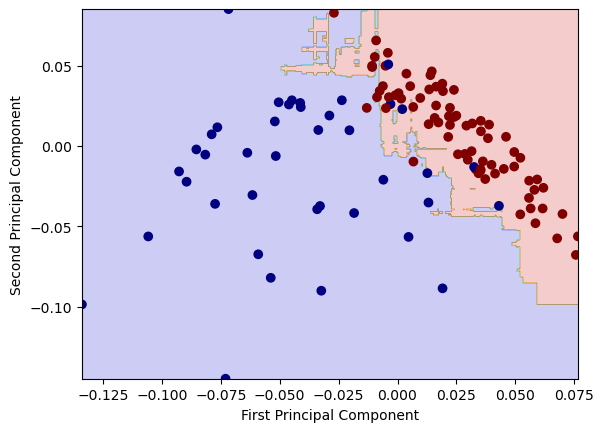

In [15]:
decision_region(rf, X_reduced_test, y_test)

#### 3(h) Train max voting classifier

You should use the hyperparameters you select before. 

Print the test accuracy, and draw the decision region.

In [16]:
#### Your code here

# set up model that combines different models, train model, then test model

voting_clf = VotingClassifier(estimators = [('kn', neigh),
                                            ('lr', Log),
                                            ('tree', Tree),
                                            ('rforest', rf)],
                              voting = 'hard')

voting_clf.fit(X_reduced_train, y_train)

acc = voting_clf.score(X_reduced_test, y_test)

print(f'Test accuracy is {acc:.3f}')

Test accuracy is 0.939


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


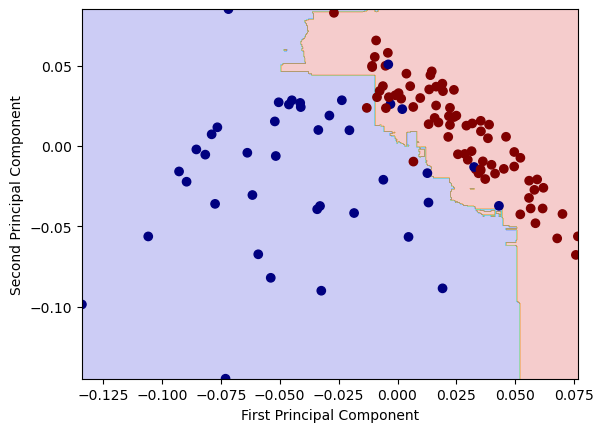

In [17]:
decision_region(voting_clf, X_reduced_test, y_test)